# Question 1

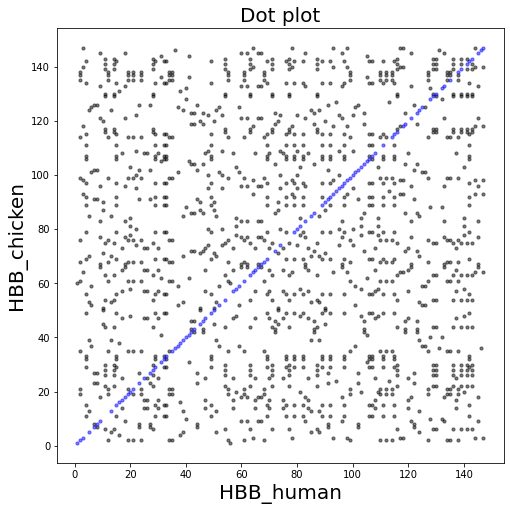

In [4]:
%matplotlib inline
from DnaUtils import readFasta
import matplotlib.pyplot as plt
human = readFasta("human.fasta")[1][0]
chicken = readFasta("chicken.fasta")[1][0]
l = [(i,j) for i,h in enumerate(human, start = 1) for j,c in enumerate(chicken, start = 1) if h == c and i != j]
x,y = list(zip(*l))
plt.figure(figsize = (8,8))
plt.scatter(x,y, c = 'k', alpha = 0.5, s = 10)
l = [(i,j) for i,h in enumerate(human, start = 1) for j,c in enumerate(chicken, start = 1) if h == c and i == j]
x,y = list(zip(*l))
plt.scatter(x,y, c = 'b', alpha = 0.5, s = 10)
plt.title("Dot plot", fontsize = 20)
plt.xlabel("HBB_human", fontsize = 20)
plt.ylabel("HBB_chicken", fontsize = 20)
plt.show()

B)

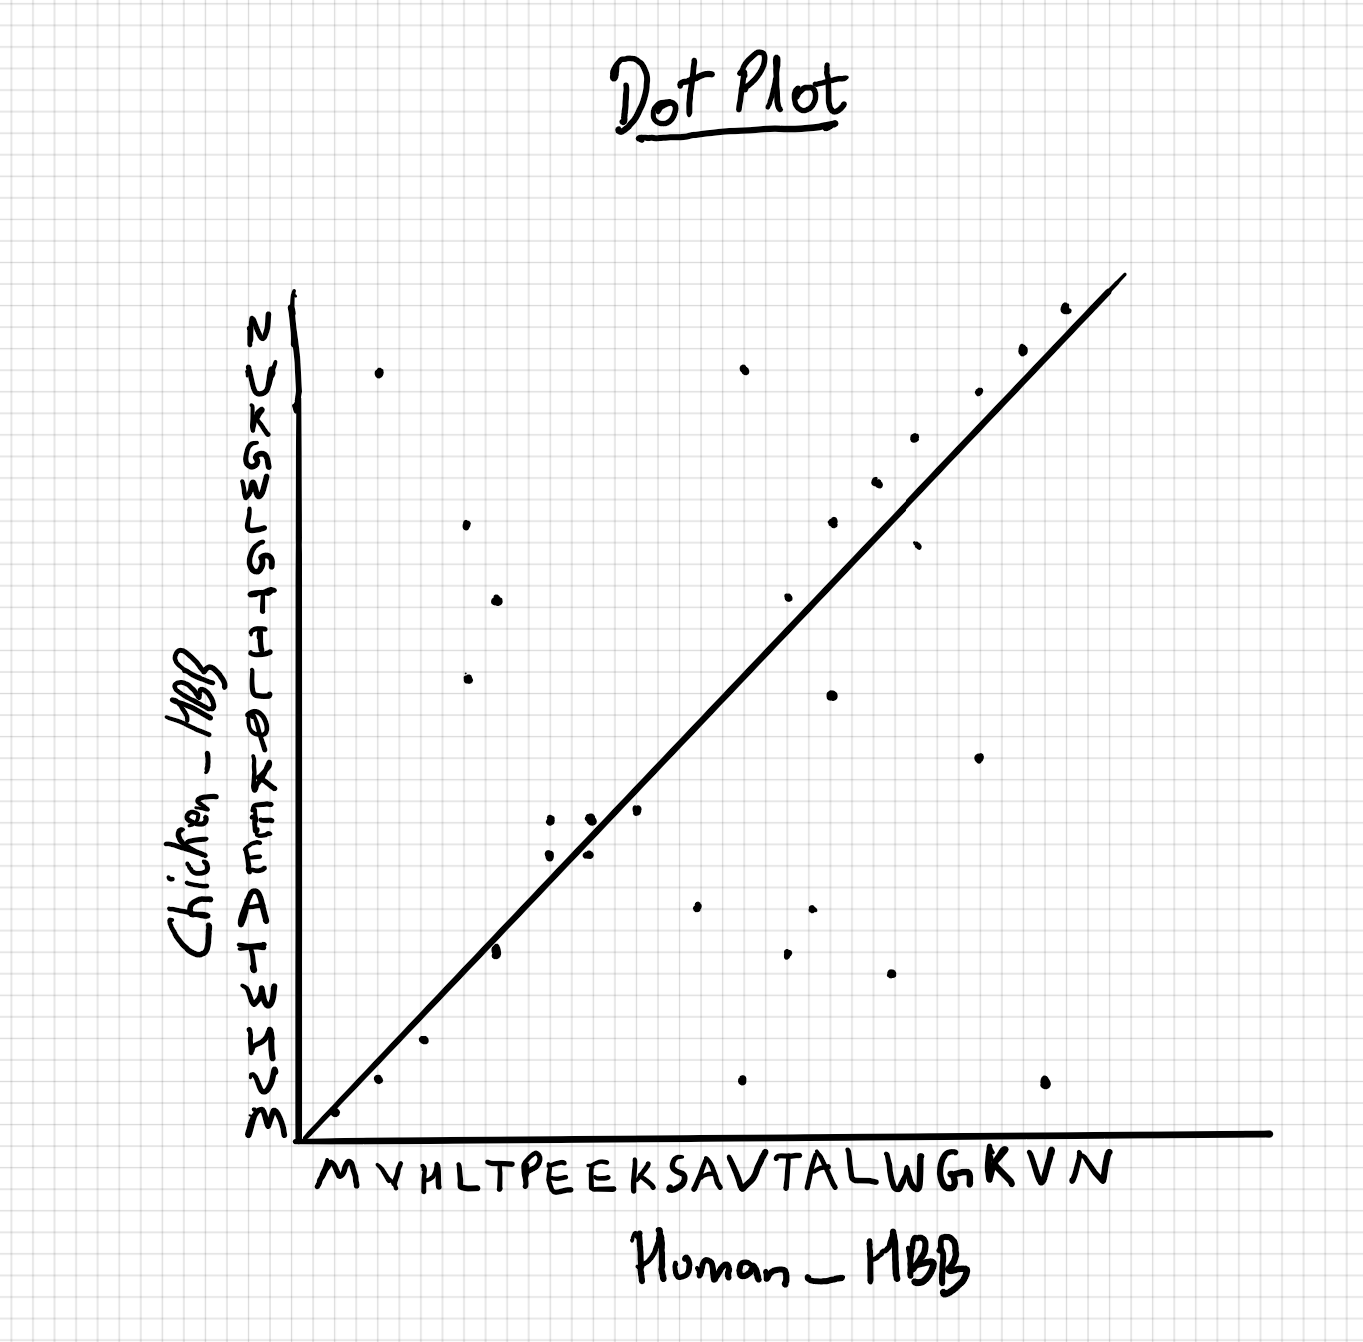

In [2]:
print(f"Number of common residues = {len(x)}")

Number of common residues = 102


# Question 2

In [3]:
def score(a,b):
    score = 0
    if a == b:
        score += 1
    elif '-' not in a+b:
        score -= 0
    else:
        score -= 1
    return score
        
def orig(s1,s2):
    from itertools import groupby
    score = 0
    for char,count in list(groupby(s1)):
        if char == '-':
            score -= 2
    for char,count in list(groupby(s2)):
        if char == '-':
            score -= 2
            
    return score
            
seq1 = "AATCTATA"
seq2 = "AAG--ATA"

print("score = ", sum([score(a,b) for a,b in zip(seq1,seq2)]) + orig(seq1,seq2))

score =  1


# Question 3

Sequence 1 = AATCTATA   
Sequence 2 = AAG--ATA   

Number of matches = 5 (+5)   
Number of mismatches = 3 (0)   
Number of times gap was created = 1 (-2)   
Length of Gaps = 2 (-2)   

score = 5 + 0 - 2 - 2   
score = 1   


# Question 4

In [3]:
import numpy as np
import pandas as pd
a = 'GTGCTGCACT'
b = 'ATCTGCAGAA'
m = len(a)
n = len(b)
subs = lambda a,b : 2 if a == b else -1
table = [[0 for i in range(m+1)] for j in range(n+1)]
table[0] = [i * 0 for i in range(m+1)]
for j in range(n+1):
    table[j][0] = 0*j
for i in range(1,n+1):
    for j in range(1,m+1):
        table[i][j] = max(table[i-1][j-1] + subs(a[j-1],b[i-1]), table[i][j-1] - 3, table[i-1][j] - 3, 0)
df = pd.DataFrame(np.matrix(table))
df.columns = ['-'] + [char for char in a]
df = df.T
df.columns = ['-'] + [char for char in b]
df.T

,-,G,T,G,C,T,G,C,A,C,T
-,0,0,0,0,0,0,0,0,0,0,0
A,0,0,0,0,0,0,0,0,2,0,0
T,0,0,2,0,0,2,0,0,0,1,2
C,0,0,0,1,2,0,1,2,0,2,0
T,0,0,2,0,0,4,1,0,1,0,4
G,0,2,0,4,1,1,6,3,0,0,1
C,0,0,1,1,6,3,3,8,5,2,0
A,0,0,0,0,3,5,2,5,10,7,4
G,0,2,0,2,0,2,7,4,7,9,6
A,0,0,1,0,1,0,4,6,6,6,8


# Question 5

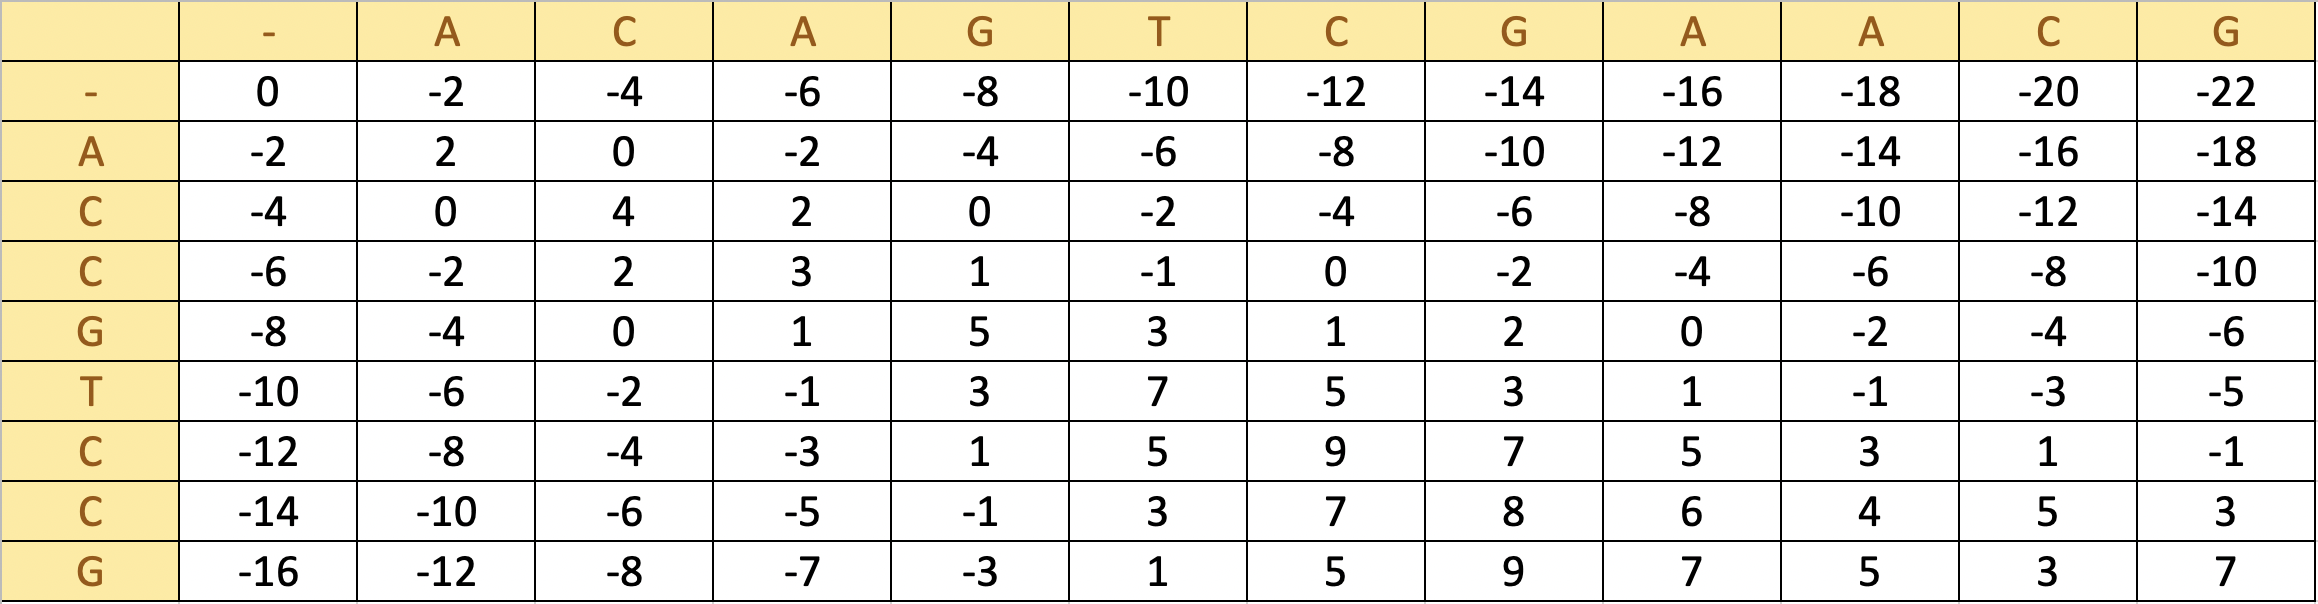